# Linear Regression #

Let's go through an Regression problem. The main steps we are going to take is: 

1. Load the data
2. Discover and visualize the data to gain insights
3. Prepare data for machine learning algorithms
4. Select an algorithm and train a model

The dataset we are going to use is the [California Housing Dataset](https://github.com/ageron/handson-ml/tree/master/datasets/housing) which contains data drawn from the 1990 U.S. Census. 

The first task you are asked to perform is to build a model of housing prices in California using the California census data. This data has metrics such as the **population**, **median income**, **median housing
price**, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short.


Your model should learn from this data and be able to **predict the median housing price in any district, given all the other metrics**.

## Create the workspace ##

If you are working *offline* you can create a conda environment now with `conda create -name linear` and install the libraries needed with `pip install matplotlib numpy pandas scipy scikit-learn`

In [3]:
#Several imports that will be needed - Check them before starting
import numpy as np
import pandas as pd
import scipy
import sklearn
import os

If you are working on Google Colab don't forget to upload the *housing.csv* file obtained from the link above using the side menu. In colab each time you need to upload your files. You can also import them from your Google Drive.

## Data Loading ##

We are loading the data using pandas. Write a small function for this, we are gonna need it later. We take a quick look into the data using pandas.

In [4]:
DATASET_PATH = "dataset/housing.csv"

def load_data_csv(csv_path=DATASET_PATH):
    return pd.read_csv(csv_path)

housing = load_data_csv()
housing.head() # Top 5 rows 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data discovery ##

In [5]:
housing.info() # Quick description of the data (types, columns, entries etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset. Notice that the total_bed
rooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. We will need to take care of this later. 

Also, all attributes are number except the oceant_proximity field. It is type object, since we loaded from csv, it is a text field. Take a look back at the top5 rows.

In [6]:
# Let's find all about this field
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# Some further information about all the fields
housing.describe()

# STD = Standard Deviation, 25% = 25th percentile, 50% = median , 75% = 75th percentile

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data visualization ##

### General visualization ###

Plotting histograms for each numerical value also helps us understand the data. A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis).

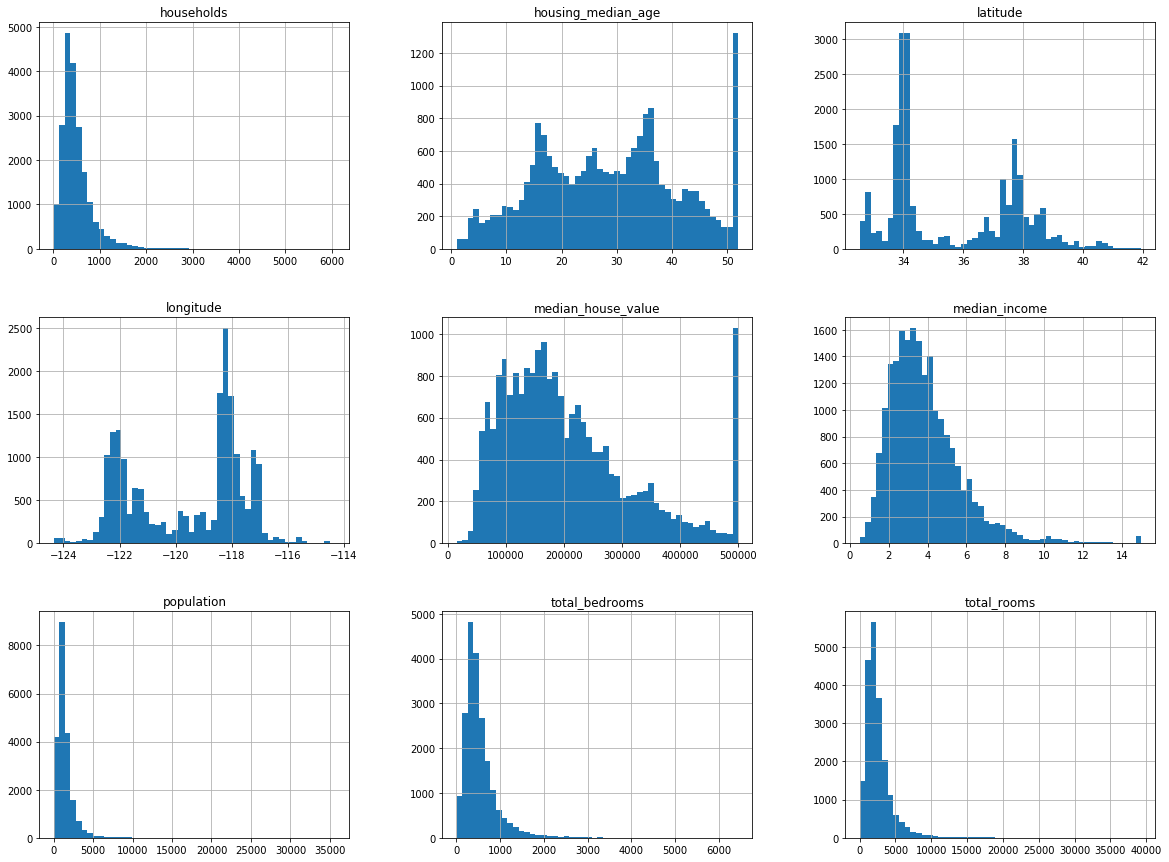

In [9]:
import matplotlib.pyplot as plt # Necessary import
housing.hist(bins=50, figsize=(20,15)) #Using like this plots for each 
#nummerical value, we choose the number of bins - the number of segments -.
plt.show()

We notice:
 * Some have been capped (median income at 15, median house age, median house value)
 * Different scales
 * Tail heavy histograms (they extend much farther to the right of the median than to the left)

## Visualizing Geographical Data ##

Since there is geographical information (latitude and longitude), it is a good idea to
create a scatterplot of all districts to visualize the data. 

Here is California in the map to help us understand our data better.

<img src="http://www.orangesmile.com/common/img_city_maps/california-state-map-3.jpg " alt="california" width="400"/>

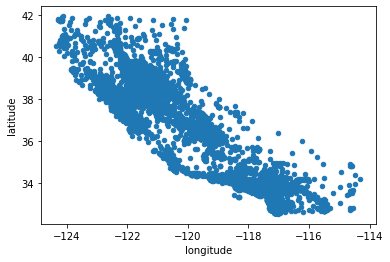

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude") # Scatter with longitute in the x axis and the latitude in th y axis. 

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points.

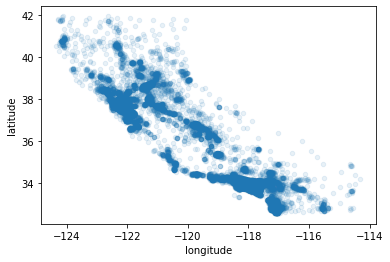

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # Scatter with longitute in the x axis and the latitude in th y axis. 

We can now see the high density areas (around the main cities of california).

More generally, our brains are very good at spotting patterns on pictures, but you may need to play around with visualization parameters to make the patterns stand out.

Let's include the housing prices. The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices).


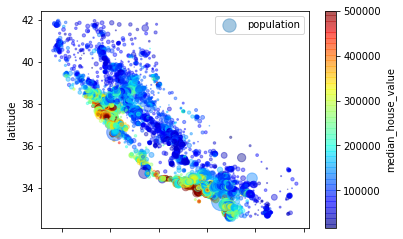

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## Create a test set ##

### Random Sampling ###
We checked a manual way and way with scikit learn to create test sets in the previous notebook. Let's split again our dataset using sklearn and a test size of 20%.



In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# Test size must be defined. Define random state to take the same sets each time
# you run the project. 

### Stratified Sampling ###

This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it
is not, you run the risk of introducing a significant sampling bias. When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone booth. They try to ensure that these 1,000 people are representative of the whole population. This is called stratified
sampling.

Suppose you chatted with experts who told you that the median income is a very important attribute to predict **median housing prices**. You may want to ensure that the test set is representative of the **various categories of incomes in the whole dataset**.

Since the median income is a continuous numerical attribute, you first need to create
an income category attribute. Try it yourself, create a category attributy based on the continuous numerical and use [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) for the sklearn livrary.

# Prepare the data for Machine Learning Algorithms #

Instead of just doing this manually, you should write functions to do that, for several good reasons:
 
 * Reproduce the transformations on any dataset
 * Build a library of transformations functions
 * Easily try various transformations
 
 Let's work with our training set and separate the features (input values) from the labels (output values - median house value)

In [21]:
housing_x = train_set.drop("median_house_value", axis=1) # Creates a copy without the specified column
housing_y = train_set["median_house_value"].copy() # Copies the column to the specified variable

## Data Cleaning ##

Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. You noticed earlier that the total_bedrooms attribute has some missing values, so let’s fix this. You have three options:

1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

In cases where you have more columns with missing values you can easily use the [Simple Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) from the scikit learn library. 


In [14]:
#housing.dropna(subset=["total_bedrooms"]) # option 1
# housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # In this case you will the median value also in the test set.
housing["total_bedrooms"].fillna(median) # option 3

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

## Handling Text and Categorical Attributes ##

The ocean_proximity fields is a text attribute. Most machine learning algorithms prefer to work with numbers, so is it better to convert these text labels to numbers.

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(encoder.classes_)


[3 3 3 ... 1 1 1]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


Each category is mapped to a value ex. <1H OCEAN is mapped  to 0, INLAND is mapped to 1 etc.

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. Obviously this is not the case (for example, categories 0 and 4 are more similar than categories 0 and 1).

To fix this we create one binary category for each attribute. One attribute is equal to 1 when the category matched the ocean proximity of the district and 0 to all other attributes.


Scikit-Learn provides a [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) encoder to convert integer categorical values into one-hot vectors. Let’s encode the categories as one-hot vectors. Note that fit_transform() expects a 2D array, but housing_cat_encoded is a 1D array, so we need to reshape it.

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

c:\users\sakri\anaconda3\envs\generalml\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After one-hot encoding we get a matrix with thousands of columns, and the matrix is full of zeros except for one 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. You can use it mostly like a normal 2D array,19 but if you really want to convert it to a (dense) NumPy array, just call the toarray() method.

In [16]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])


## Feature Scaling ##

For normalization you can use the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) and for Standardization you can use the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

## Pipelines ##

You can combine all the transformations into one [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be anything you like.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

housing_num = housing.drop("ocean_proximity", axis=1) # Get only the numerical values


# Set up the pipeline
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('normalization', MinMaxScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

pd.DataFrame(housing_num_tr).head()

  




,0,1,2,3,4,5,6,7,8
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638


Let's join the numerical values with the categorical. We do that with the [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

In [24]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

# Specify the transformer and the columns to affect. You also use pipelines as transformer.
full_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, housing_x.columns[:-1]),
    ('label_binarizer', OneHotEncoder(),[housing_x.columns[-1]])
])

housing_prepared = full_pipeline.fit_transform(housing_x)
pd.DataFrame(housing_prepared).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.729084,0.017021,0.627451,0.079455,0.097145,0.064380,0.102286,0.190322,0.0,0.0,0.0,0.0,1.0
1,0.616534,0.129787,0.941176,0.085966,0.121974,0.036744,0.124157,0.228452,0.0,0.0,0.0,0.0,1.0
2,0.385458,0.224468,0.058824,0.048197,0.051210,0.025561,0.055090,0.252162,0.0,0.0,0.0,0.0,1.0
3,0.721116,0.014894,0.686275,0.036090,0.056797,0.039659,0.058214,0.099488,0.0,0.0,0.0,0.0,1.0
4,0.453187,0.450000,0.823529,0.060532,0.066729,0.024412,0.062325,0.210638,0.0,1.0,0.0,0.0,0.0


## Select and Train a Model  ##

Following all these steps made the process of training a model and evaluating it much simpler. In this sections will train a regression using the sklearn method of LinearRegression and using Normal Equation



### Linear Regression (sklearn) ###

We train a linear regression model using the scikit learn library.

In [25]:
housing_x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [27]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Let's try out on few instances from the training set
some_data = housing_x.iloc[:5] # Choosing some data
some_labels = housing_y.iloc[:5] # Don't forget to also get the labels
some_data_prepared = full_pipeline.transform(some_data) # Transform thoses data with the pipeline
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [188608. 290368. 251168. 146880. 165728.]
Labels:		 [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


Predictions doesn't seem very accurate. Let's measure this regression model’s Root Mean Square Error (RMSE)

In [30]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared) # Taking the predictions on the training set
lin_mse = mean_squared_error(housing_y, housing_predictions) # Computing mean squared error
lin_rmse = np.sqrt(lin_mse) # Taking the root
lin_rmse

68434.07564464878

### Linear Regression (Normal Equation) ###

To find the value of θ that minimizes the cost function, there is a closed-form solution
—in other words, a mathematical equation that gives the result directly. This is called
the Normal Equation.

$ θ=(X^TX)^{−1}X^{T}y $




#### A simple example ####

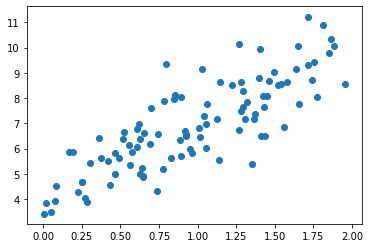

In [31]:
# Creating random X and y
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(x=X,y=y) # Let's see our data

In [32]:
# We will use the pinv() function from NumPy’s Linear Algebra module (np.linalg) 7
# to compute the inverse of a matrix, and the dot() method for matrix multiplication

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.16657185],
       [2.85641032]])

[[4.16657185]
 [9.87939248]]


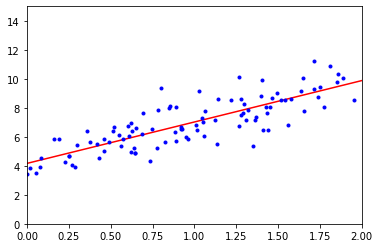

In [33]:
# Prediction
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#### Back to our example ####



In [34]:
X = housing_prepared
y = housing_y

X_b = np.c_[np.ones((X.shape[0], 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)
print(lin_reg.intercept_)
print(lin_reg.coef_)


[  227152.78456686  -269456.26465953  -239402.5092688     56211.43928255
  -236753.55975721   662374.86390025 -1361971.12838022   293424.98969755
   572380.53483715    26503.97405135   -13282.68210998   162629.04666665
    21367.33183388    29935.11412451]
-2.0278195313253046e+17
[-2.70670311e+05 -2.40534865e+05  5.61949605e+04 -2.37259054e+05
  6.62570925e+05 -1.36205083e+06  2.93660894e+05  5.72403409e+05
  2.02781953e+17  2.02781953e+17  2.02781953e+17  2.02781953e+17
  2.02781953e+17]


In [36]:
# Let's try out on few instances from the training set
some_data = housing.iloc[:5] # Choosing some data
some_labels = housing_y.iloc[:5] # Don't forget to also get the labels
some_data_prepared = full_pipeline.transform(some_data) # Transform thoses data with the pipeline
print("Predictions Regression:\t", lin_reg.predict(some_data_prepared))


X_new_b = np.c_[np.ones((some_data_prepared.shape[0], 1)), some_data_prepared] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print("Predictions Normal Equation:\t", y_predict)


# print("Labels:\t", list(some_labels))

Predictions Regression:	 [410592. 420320. 380160. 322176. 255392.]
Predictions Normal Equation:	 [410584.35930772 420289.97024993 380144.85180159 322137.96521448
 255370.01028111]


In [38]:
#Measuring the performance with RMSE using Normal Equation
housing_predictions = X_b.dot(theta_best) # Taking the predictions on the training set
lin_mse = mean_squared_error(housing_y, housing_predictions) # Computing mean squared error
lin_rmse = np.sqrt(lin_mse) # Taking the root
lin_rmse


68433.93736666224

## Stohastic Gradient Descent ##

You can find the Stohastic Gradient Descent in the scikit-learn as [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html). 



In [39]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=5000,penalty=None,tol=-np.infty, random_state=42)
sgd_reg.fit(X, y)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [41]:
housing_predictions = sgd_reg.predict(housing_prepared) # Taking the predictions on the training set
lin_mse = mean_squared_error(housing_y, housing_predictions) # Computing mean squared error
lin_rmse = np.sqrt(lin_mse) # Taking the root
lin_rmse

68481.25862982399

 ### Regularized Linear Models ###
 
 A good way to reduce overfitting is to regularize the model. 
 
 We will look in L1 regularization (Lasso regression) & L2 (Ridge regression)
 
Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.



In [0]:
#  Here is how to perform Ridge Regression with Scikit-Learn.

from sklearn.linear_model import Ridge
ridge_reg = Ridge(solver='sag',random_state=42)
ridge_reg.fit(X, y)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='sag', tol=0.001)

In [0]:
housing_predictions = ridge_reg.predict(housing_prepared) # Taking the predictions on the training set
lin_mse = mean_squared_error(housing_labels, housing_predictions) # Computing mean squared error
lin_rmse = np.sqrt(lin_mse) # Taking the root
lin_rmse

68641.04590816257

Using Stochastic Gradient Descent... The penalty hyperparameter sets the type of regularization term to use. Specifying
"l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the ℓ2 norm of the weight vector.

In [0]:
sgd_reg = SGDRegressor(tol=-np.inf, penalty="l2", random_state=42)
sgd_reg.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [0]:
housing_predictions = sgd_reg.predict(housing_prepared) # Taking the predictions on the training set
lin_mse = mean_squared_error(housing_labels, housing_predictions) # Computing mean squared error
lin_rmse = np.sqrt(lin_mse) # Taking the root
lin_rmse

69629.53025356801

In [0]:
# Using Lasso

from sklearn.linear_model import Lasso
lasso_reg = Lasso(max_iter=5000,alpha=1,random_state=42)
lasso_reg.fit(X, y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
housing_predictions = lasso_reg.predict(housing_prepared) # Taking the predictions on the training set
lin_mse = mean_squared_error(housing_labels, housing_predictions) # Computing mean squared error
lin_rmse = np.sqrt(lin_mse) # Taking the root
lin_rmse

68434.12853878703

# Logistic Regression (Classification)#

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result. 


Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal
width feature using the iris dataset. This is a binary classification problem.


## Using sklearn ##

In [42]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 

iris_dataset = load_iris() # Loading the dataset (already exists in the library)

# Lets explore our data
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

# Description of the dataset 
print(iris_dataset['DESCR'][:500] + "\n...")

print("Target names: {}".format(iris_dataset['target_names'])) # Print the target names
print("Feature names: \n{}".format(iris_dataset['feature_names'])) # Feature names


X = iris_dataset["data"][:, 3:] # petal width
y = (iris_dataset["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                

...
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


c:\users\sakri\anaconda3\envs\generalml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


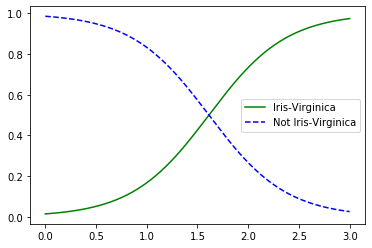

In [43]:
# Training with sklearn's Logistic Regression
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(X, y)


#Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm


X_new = np.linspace(0, 3, 1000).reshape(-1, 1) #Return evenly spaced numbers over a specified interval.

y_proba = log_reg.predict_proba(X_new) # Predict
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica") #Green line (specified with g-)
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica") # Blue line (specified with b--)
plt.legend()


# Using the predict method we get the class instantly rather than the probability. 

## Using numpy functions ##

Logistic Regression model estimated probability : $$h_\theta(X)= \sigma(\theta^T  X)$$

and the sigmoid function:
$$\sigma(t)= \dfrac{1}{1 + exp(-t)}$$


Setting the decision boundary to 0.5, so:

$h_\theta(X) \geq 0.5 -> y = 1$

$h_\theta(X) < 0.5 -> y = 0$

### A simple example ###
Let's create some dummy data! 

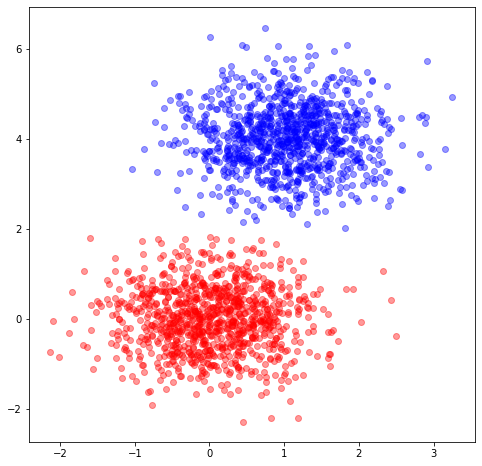

In [44]:
num_observations = 1000 #number of observations of each 

x1 = np.random.multivariate_normal([0, 0], [[0.5, 0],[0, 0.5]], num_observations) #Draw random samples from a multivariate normal distribution
x2 = np.random.multivariate_normal([1, 4], [[0.5, 0],[0, 0.5]], num_observations)


X = np.vstack((x1, x2)).astype(np.float32) #Combine features together
y = np.hstack((np.zeros(num_observations),np.ones(num_observations))) #Create the labels


plt.figure(figsize=(8,8))
plt.scatter(X[0:num_observations, 0], 
            X[0:num_observations, 1],
            c = 'r', alpha = .4)
plt.scatter(X[num_observations:, 0], 
            X[num_observations:, 1],
            c = 'b', alpha = .4)

In [45]:
def sigmoid(scores):
    return 1. / (1. + np.exp(-scores))
  
def cost(features, target, weights):
  scores = np.dot(features, weights)
  ll = np.sum( -target*np.log(sigmoid(scores)) - (1-target)*np.log(1-sigmoid(scores)))
  return ll


def logistic_regression(features, target, num_steps, learning_rate, converge):
    intercept = np.ones((features.shape[0], 1))
    features = np.hstack((intercept, features))
    current_cost = 0
    prev_cost = 1
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
      scores = np.dot(features, weights)
      predictions = sigmoid(scores)

      # Update weights with log likelihood gradient
      output_error_signal = predictions - target

      gradient = np.dot(features.T, output_error_signal)
      weights -= learning_rate * gradient
      
      current_cost = cost(features, target, weights)
      # Print log-likelihood every so often
      if step % 1000 == 0:
          print(current_cost)
      
      if prev_cost-current_cost < converge and step!=0:
        print(current_cost)
        break
      prev_cost = current_cost
        
    return weights

In [46]:
weights = logistic_regression(X, y, num_steps = 50000, learning_rate = 5e-4,converge=0.0001)
weights

778.6123041399992
14.774642729270692
9.84483202080251
7.7991279247823835
6.61801427480281
5.827729693500334
5.25228076480821
4.809564198871208
4.455526187426055
4.164158233445763
3.9189963836309873
3.709048601014377
3.5266610367933025
3.3663196102941875
3.2239383161908726
3.0964167906613156
2.981354537498855
2.879656541137491


array([-15.03724249,   1.6686622 ,   7.24387622])

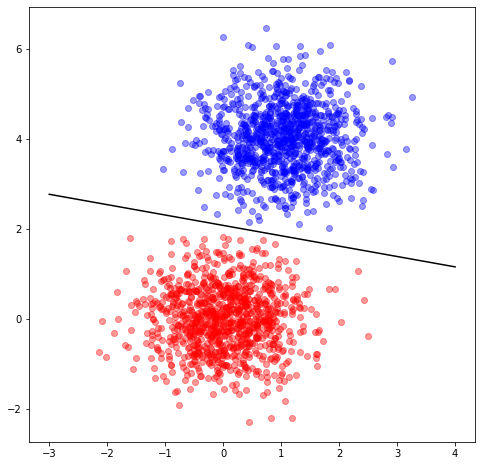

In [47]:
# Plot again
plt.figure(figsize=(8,8))
plt.scatter(X[0:num_observations, 0], 
            X[0:num_observations, 1],
            c = 'r', alpha = .4)
plt.scatter(X[num_observations:, 0], 
            X[num_observations:, 1],
            c = 'b', alpha = .4)

x_boundary = np.linspace(-3, 4, 1000) # Return evenly spaced numbers over a specified interval.

y_boundary = -((weights[1] * x_boundary/weights[2]) + (weights[0] / weights[2])) # y = -(ax/c + b/c)
plt.plot(x_boundary, y_boundary, color='black')


### Back to our example ###

Try to use the same functions to train the iris dataset!

## Multi-class classification ##

What happends if we want to train a model with all the labels of the iris dataset?

**Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass
classification task, and it automatically runs One-Vs-All (OvA)** 

`Please always use the multi_class parameter since the library constantly changes the defaults of the parameters`


In [0]:
iris_dataset = load_iris()

X = iris_dataset["data"][:, 3:]
y = iris_dataset["target"]  
print(X.flatten())
print(y)

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.  2.3 1.8]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
#Using one-vs-all
log_reg = LogisticRegression(solver='liblinear',multi_class='ovr') # ovr stands for one-vs-rest or one-vs-all.
log_reg.fit(X, y)

print("Targets: {}".format(y))
print("Predictions: {}".format(log_reg.predict(X)))

X_new = [[5.0]]
print("Predictions: {}".format(log_reg.decision_function(X_new)))
print("Predictions: {}".format(log_reg.predict(X_new)))


# Under the hood,Scikit-Learn actually trained 3 binary classifiers, got their decision scores for the
# iris and selected the class with the highest score. The confidence score for a sample is the signed distance of that sample to the hyperplane.

Targets: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1
 1 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predictions: [[-17.15162978   0.29881776   8.86737135]]
Predictions: [2]


In [0]:
# Using multinomial
log_reg = LogisticRegression(solver='lbfgs',multi_class='multinomial') # multinomial
log_reg.fit(X, y)

print("Targets: {}".format(y))
print("Predictions: {}".format(log_reg.predict(X)))

X_new = [[5.0]]
print("Predictions: {}".format(log_reg.decision_function(X_new)))
print("Predictions: {}".format(log_reg.predict(X_new)))



Targets: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predictions: [[-16.92556281   1.49059718  15.43496563]]
Predictions: [2]


If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance and pass a binary classifier to its constructor.

In [0]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(LogisticRegression(solver="lbfgs"))
ovo_clf.fit(X,y)


print("Targets: {}".format(y))
print("Predictions: {}".format(ovo_clf.predict(X)))

X_new = [[5.0]]
print("Predictions: {}".format(ovo_clf.decision_function(X_new)))
print("Predictions: {}".format(ovo_clf.predict(X_new)))

Targets: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predictions: [[-0.5         1.06806269  2.43193731]]
Predictions: [2]
